In [1]:
# libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('tourism_data.csv')
df.head()

,Tourist Name,Country,Arrival Date,Departure Date,Age,Gender,Purpose of Visit,Spending (USD),Feedback
0,Jonathan Rodriguez,France,2025-02-25,03-01-2025,18,Male,BUSINESS,NaN,poor
1,Andrew Woods,MR,2024-06-26,2024-07-06,47,F,Study,NaN,NaN
2,Christopher Powers,Puerto Rico,2025-03-09,2025-03-13,42,f,Business,711,bad
3,Matthew Olson,,2025-03-24,2025-04-03,41,male,Holiday,4777,bad
4,Tina Barrera,Egypt,2024-09-22,2024-10-03,NaN,f,Holiday,551.17,excelllent


In [3]:
#Rename columns
df.columns = [
    'Name', 'Country', 'Arrival_Date', 'Departure_Date',
    'Age', 'Gender', 'Purpose_of_Visit', 'Spending_USD', 'Feedback' 
]
print("Number of rows before cleaning:", df.shape[0])

Number of rows before cleaning: 100000


In [4]:
#Handling Missing Values
df.isnull().sum()

Name                    0
Country                56
Arrival_Date            0
Departure_Date          0
Age                 39983
Gender                  0
Purpose_of_Visit    12425
Spending_USD        39709
Feedback             9881
dtype: int64

In [5]:
df.fillna({'Country': 'Unknown', 'Purpose': 'Unknown', 'Gender': 'Unknown'}, inplace=True)
df.dropna(subset=['Arrival_Date', 'Departure_Date', 'Age', 'Spending_USD'], inplace=True)

In [6]:
print("Number of rows after cleaning:", df.shape[0])

Number of rows after cleaning: 36109


In [7]:
df.replace(["N/A", "", " ", "n/a", "NA", None], np.nan, inplace=True)

print("Missing value placeholders replaced.")

Missing value placeholders replaced.


In [8]:
# Fix Date Formats in Arrival and Departure Dates 
df['Arrival_Date'] = pd.to_datetime(df['Arrival_Date'], errors='coerce')
df['Departure_Date'] = pd.to_datetime(df['Departure_Date'], errors='coerce')

In [9]:
#Clean Spending Column
def convert_spending(value):
    if pd.isna(value):
        return np.nan
    value = str(value).strip().lower()
    if value == 'one thousand':
        return 1000.0
    elif value.replace('.', '', 1).isdigit():
        return float(value)
    else:
        return np.nan

df['Spending_USD'] = df['Spending_USD'].apply(convert_spending)

print("Spending column cleaned.")

Spending column cleaned.


In [10]:
#Standardize Gender Column
gender_map = {
    'Male': 'Male',
    'male': 'Male',
    'M': 'Male',
    'Female': 'Female',
    'female': 'Female',
    'F': 'Female',
    'MALE': 'Male',
    'Female': 'Female'
}
df['Gender'] = df['Gender'].map(gender_map)

print("Gender Column standardized.")


Gender Column standardized.


In [11]:
#Clean Purpose of Visit
df['Purpose_of_Visit'] = df['Purpose_of_Visit'].str.strip().str.title()
print("Purpose of Visit field cleaned.")

Purpose of Visit field cleaned.


In [12]:
#Handle Age Column
# Convert to numeric
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')
# Fill missing age with median
df['Age'] = df['Age'].fillna(df['Age'].median())
print("Age column cleaned.")

Age column cleaned.


In [18]:
# Add Duration of Stay
df['Duration'] = (df['Departure_Date'] - df['Arrival_Date']).dt.days

In [19]:
#View Cleaned Data
print("First few rows of cleaned data:")
df.head()

First few rows of cleaned data:


,Name,Country,Arrival_Date,Departure_Date,Age,Gender,Purpose_of_Visit,Spending_USD,Feedback,Duration of Stay (days),Duration
2,Christopher Powers,Puerto Rico,2025-03-09,2025-03-13,42.0,NaN,Business,711.0,bad,4.0,4.0
3,Matthew Olson,NaN,2025-03-24,2025-04-03,41.0,Male,Holiday,4777.0,bad,10.0,10.0
7,Mr. Rickey Graham,UK,2024-11-22,2024-12-11,38.0,Female,Leisure,3044.0,excelllent,19.0,19.0
8,Ariel Kane,China,2025-02-01,2025-02-19,49.0,Male,Holiday,2708.0,excelllent,18.0,18.0
11,Jacob Delgado,France,2025-02-28,2025-03-09,47.0,Male,NaN,3918.0,Ok,9.0,9.0


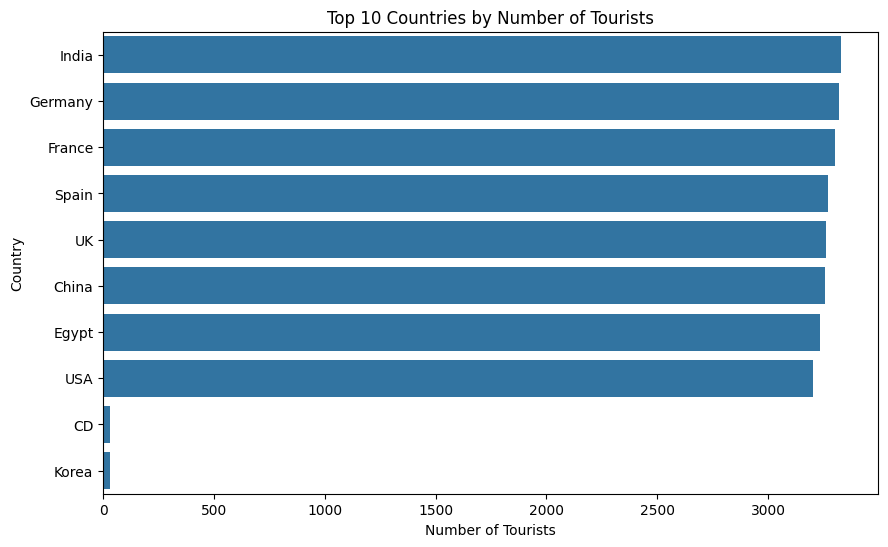

In [15]:
#Q1: Which countries have the most visitors?
top_countries = df['Country'].value_counts(dropna=True).head(10)
plt.figure(figsize=(10,6))
sns.barplot(x=top_countries.values, y=top_countries.index)
plt.title('Top 10 Countries by Number of Tourists')
plt.xlabel('Number of Tourists')
plt.ylabel('Country')
plt.show()

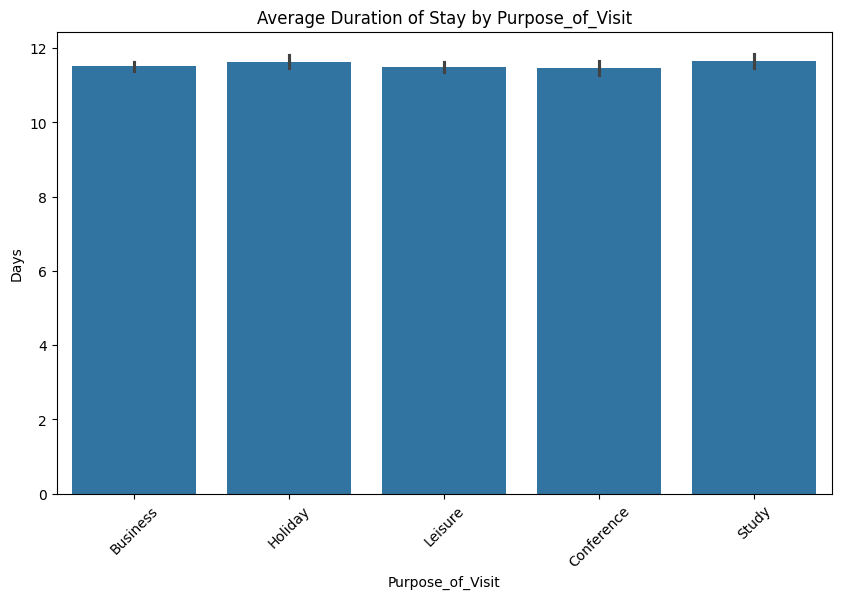

In [38]:
#Q2: What is the average duration of stay by Purpose_of_Visit?
plt.figure(figsize=(10,6))
sns.barplot(x='Purpose_of_Visit', y='Duration', data=df, estimator=np.mean)
plt.xticks(rotation=45)
plt.title('Average Duration of Stay by Purpose_of_Visit')
plt.ylabel('Days')
plt.show()

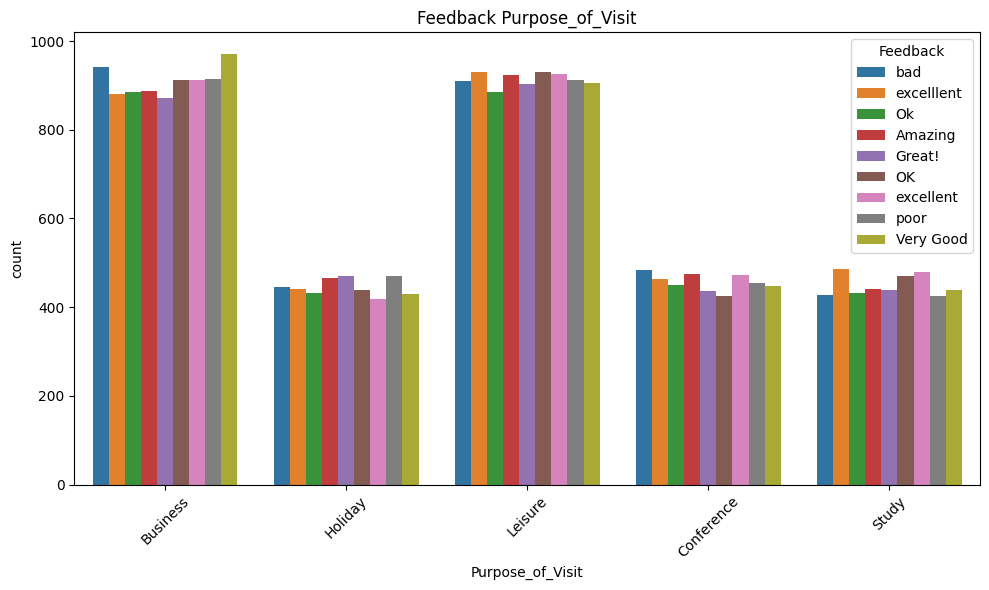

In [39]:
#Q3: How does feedback vary across travel types?
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='Purpose_of_Visit', hue='Feedback')
plt.xticks(rotation=45)
plt.title('Feedback Purpose_of_Visit')
plt.legend(title='Feedback')
plt.tight_layout()
plt.show()

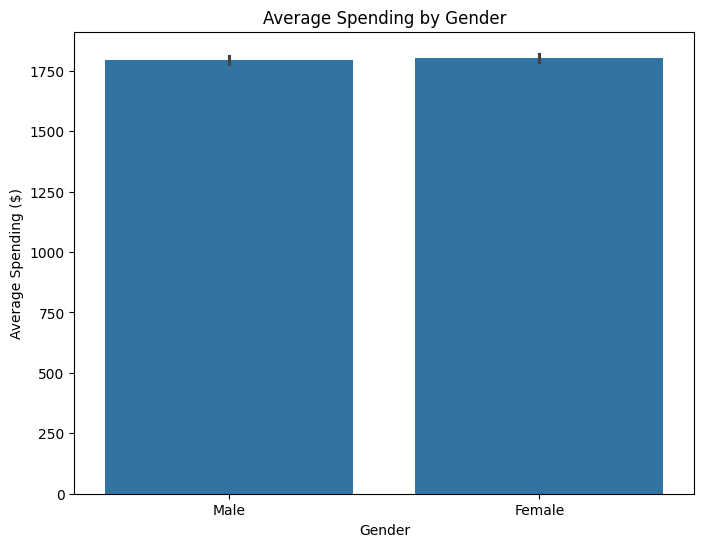

In [23]:
# Q4: What is the average spending by gender?
plt.figure(figsize=(8,6))
sns.barplot(x='Gender', y='Spending_USD', data=df, estimator=np.mean)
plt.title('Average Spending by Gender')
plt.ylabel('Average Spending ($)')
plt.show()

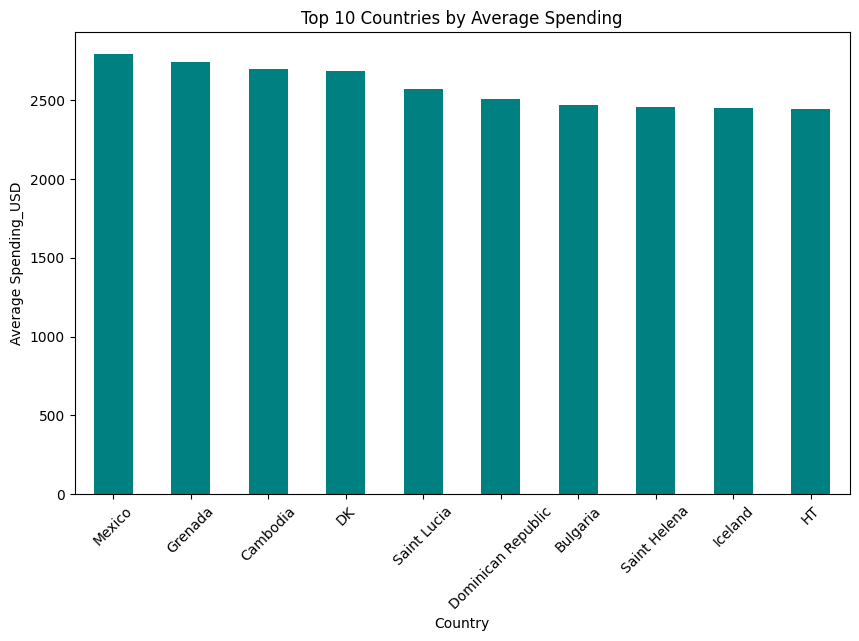

In [33]:
#Q5: Which countries have the highest average spending?
avg_spending = df.groupby('Country')['Spending_USD'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
avg_spending.plot(kind='bar', color='teal')
plt.title("Top 10 Countries by Average Spending")
plt.xlabel("Country")
plt.ylabel("Average Spending_USD")
plt.xticks(rotation=45)
plt.show()

C:\Users\Doha\AppData\Local\Temp\ipykernel_18184\1907802676.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=purpose_counts.values, y=purpose_counts.index, palette="magma")


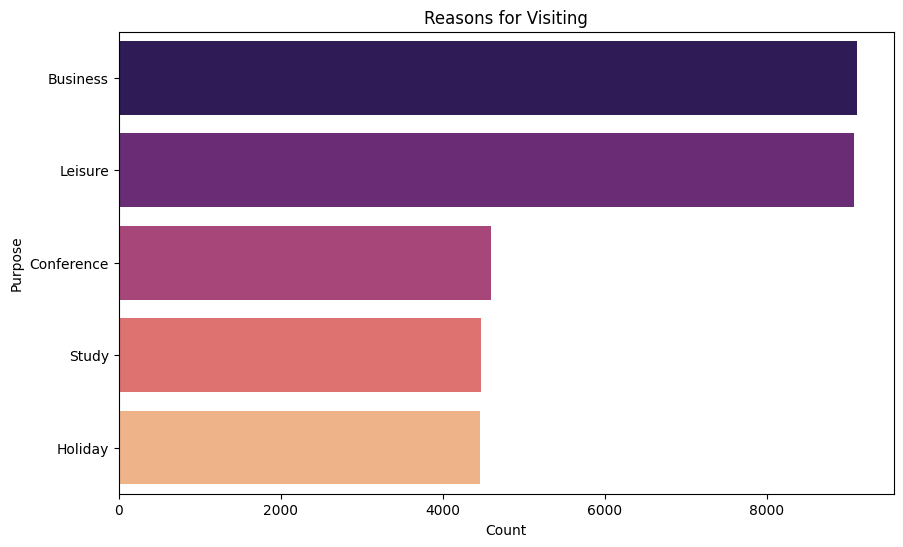

In [28]:
#Q6:Most Common Reasons for Visiting
plt.figure(figsize=(10,6))
purpose_counts = df['Purpose_of_Visit'].value_counts()
sns.barplot(x=purpose_counts.values, y=purpose_counts.index, palette="magma")
plt.title("Reasons for Visiting")
plt.xlabel("Count")
plt.ylabel("Purpose")
plt.show()

C:\Users\Doha\AppData\Local\Temp\ipykernel_18184\3791009780.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_spend_purpose.values, y=avg_spend_purpose.index, palette="rocket")


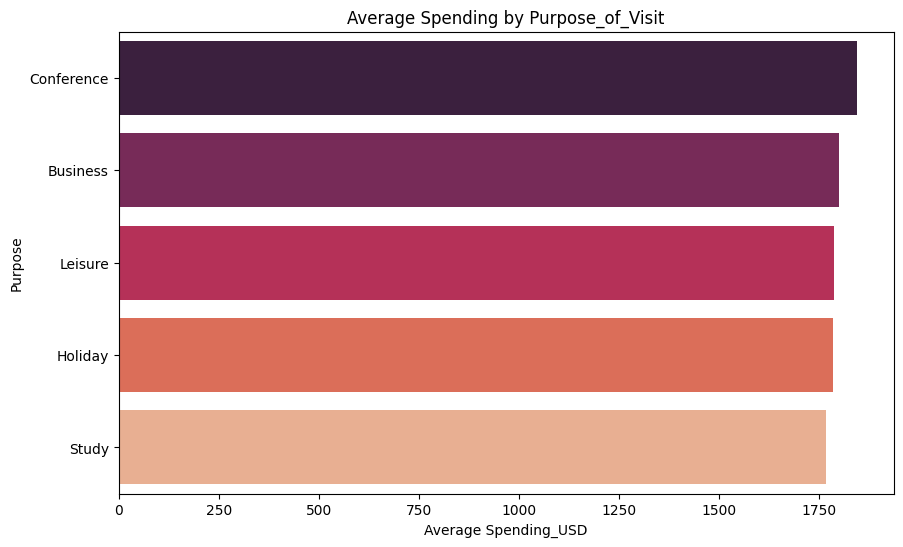

In [29]:
#Q7 Average Spending by Purpose of Visit
avg_spend_purpose = df.groupby('Purpose_of_Visit')['Spending_USD'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,6))
sns.barplot(x=avg_spend_purpose.values, y=avg_spend_purpose.index, palette="rocket")
plt.title("Average Spending by Purpose_of_Visit")
plt.xlabel("Average Spending_USD")
plt.ylabel("Purpose")
plt.show()

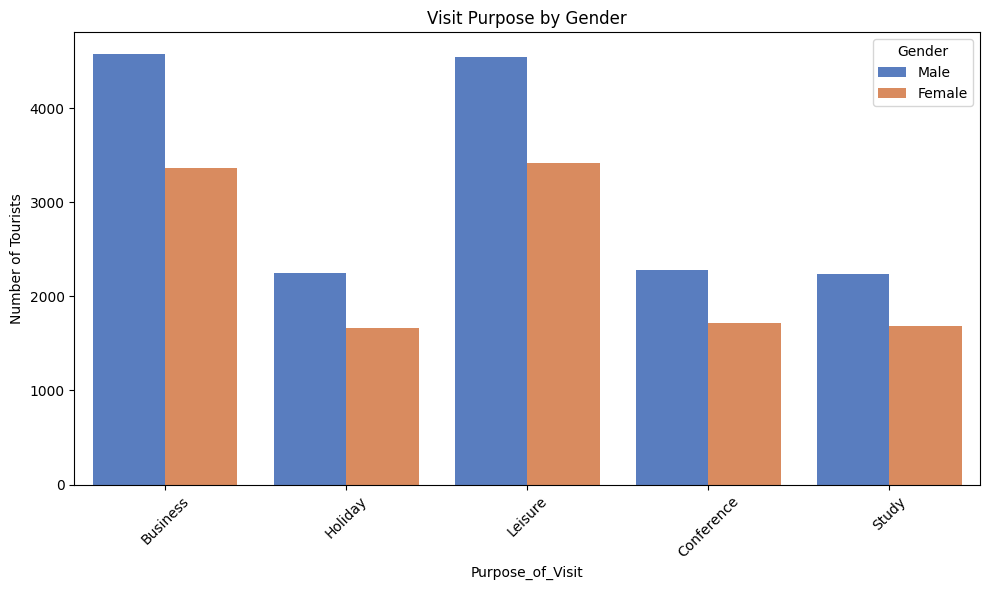

In [36]:
#Q8:Does gender affect the type of visit preferred?
plt.figure(figsize=(10, 6))
sns.countplot(x='Purpose_of_Visit', hue='Gender', data=df, palette="muted")
plt.xticks(rotation=45)
plt.title("Visit Purpose by Gender")
plt.xlabel("Purpose_of_Visit")
plt.ylabel("Number of Tourists")
plt.legend(title="Gender")
plt.tight_layout()
plt.show()